In [1]:
# 导入类库
import numpy as np
from matplotlib import pyplot
from pandas import read_csv
from pandas.plotting import scatter_matrix
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# 导入数据
filename = 'sonar.all-data.csv'
dataset = read_csv(filename, header=None)

In [3]:
# 数据维度
print(dataset.shape)

(208, 61)


In [4]:
# 查看数据类型
set_option('display.max_rows', 500)
print(dataset.dtypes)

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55    float64
56    float64
57    float64
58    float64
59    float64
60     object
dtype: object


In [6]:
# 查看最初的20条记录
set_option('display.width', 100)
print(dataset.head(10))

       0       1       2       3       4       5       6       7       8       9  ...      51  \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109  0.2111 ...  0.0027   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337  0.2872 ...  0.0084   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598  0.6194 ...  0.0232   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598  0.1264 ...  0.0121   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564  0.4459 ...  0.0031   
5  0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105  0.3039 ...  0.0045   
6  0.0317  0.0956  0.1321  0.1408  0.1674  0.1710  0.0731  0.1401  0.2083  0.3513 ...  0.0201   
7  0.0519  0.0548  0.0842  0.0319  0.1158  0.0922  0.1027  0.0613  0.1465  0.2838 ...  0.0081   
8  0.0223  0.0375  0.0484  0.0475  0.0647  0.0591  0.0753  0.0098  0.0684  0.1487 ...  0.0145   
9  0.0164  0.0173  0.0347  0.0

In [7]:
# 描述性统计信息
set_option('precision', 3)
print(dataset.describe())

            0          1        2        3        4        5        6        7        8        9   \
count  208.000  2.080e+02  208.000  208.000  208.000  208.000  208.000  208.000  208.000  208.000   
mean     0.029  3.844e-02    0.044    0.054    0.075    0.105    0.122    0.135    0.178    0.208   
std      0.023  3.296e-02    0.038    0.047    0.056    0.059    0.062    0.085    0.118    0.134   
min      0.002  6.000e-04    0.002    0.006    0.007    0.010    0.003    0.005    0.007    0.011   
25%      0.013  1.645e-02    0.019    0.024    0.038    0.067    0.081    0.080    0.097    0.111   
50%      0.023  3.080e-02    0.034    0.044    0.062    0.092    0.107    0.112    0.152    0.182   
75%      0.036  4.795e-02    0.058    0.065    0.100    0.134    0.154    0.170    0.233    0.269   
max      0.137  2.339e-01    0.306    0.426    0.401    0.382    0.373    0.459    0.683    0.711   

         ...           50         51         52       53         54         55         56 

In [8]:
# 数据的分类分布
print(dataset.groupby(60).size())

60
M    111
R     97
dtype: int64


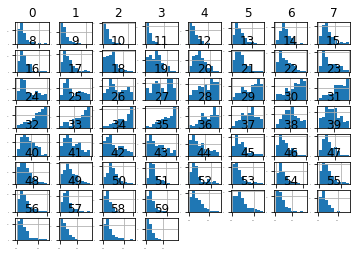

In [9]:
# 直方图
dataset.hist(sharex=False, sharey=False,xlabelsize=1, ylabelsize=1)
pyplot.show()

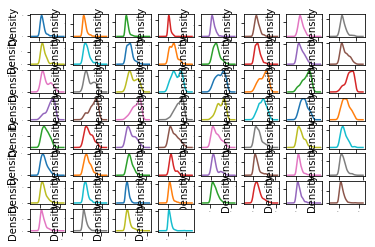

In [10]:
# 密度图
dataset.plot(kind='density', subplots=True, layout=(8, 8), sharex=False, legend=False, fontsize=1)
pyplot.show()

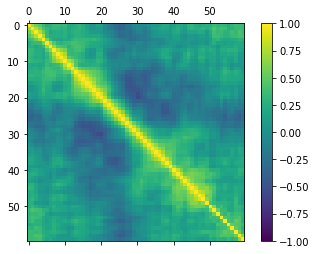

In [11]:
# 关系矩阵图
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
pyplot.show()

In [12]:
# 分离评估数据集
array = dataset.values
X = array[:, 0:60].astype(float)
Y = array[:, 60]
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

LR : 0.782721 (0.093796)
LDA : 0.746324 (0.117854)
KNN : 0.808088 (0.067507)
CART : 0.717279 (0.103497)
NB : 0.648897 (0.141868)
SVM : 0.608824 (0.118656)


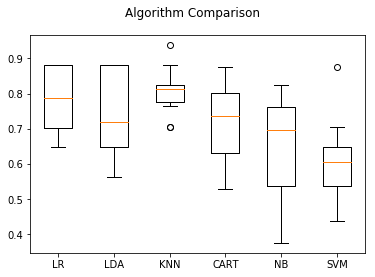

In [13]:
# 评估算法的基准
num_folds = 10
seed = 7
scoring = 'accuracy'

# 评估算法 - 原始数据
models = {}
models['LR'] = LogisticRegression()
models['LDA'] = LinearDiscriminantAnalysis()
models['KNN'] = KNeighborsClassifier()
models['CART'] = DecisionTreeClassifier()
models['NB'] = GaussianNB()
models['SVM'] = SVC()
results = []
for key in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(models[key], X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    print('%s : %f (%f)' % (key, cv_results.mean(), cv_results.std()))

# 评估算法 - 箱线图
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(models.keys())
pyplot.show()

ScalerLR : 0.734191 (0.095885)
ScalerLDA : 0.746324 (0.117854)
ScalerKNN : 0.825735 (0.054511)
ScalerCART : 0.735662 (0.111591)
ScalerNB : 0.648897 (0.141868)
ScalerSVM : 0.836397 (0.088697)


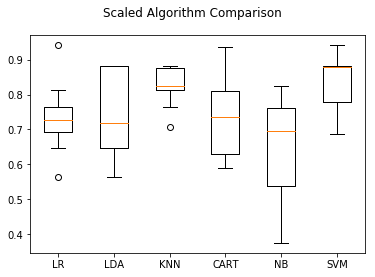

In [14]:
# 评估算法 - 正态化数据
pipelines = {}
pipelines['ScalerLR'] = Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression())])
pipelines['ScalerLDA'] = Pipeline([('Scaler', StandardScaler()), ('LDA', LinearDiscriminantAnalysis())])
pipelines['ScalerKNN'] = Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])
pipelines['ScalerCART'] = Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])
pipelines['ScalerNB'] = Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])
pipelines['ScalerSVM'] = Pipeline([('Scaler', StandardScaler()), ('SVM', SVC())])
results = []
for key in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(pipelines[key], X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    print('%s : %f (%f)' % (key, cv_results.mean(), cv_results.std()))

# 评估算法 - 箱线图
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(models.keys())
pyplot.show()

In [15]:
# 调参改进算法 - KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]}
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=rescaledX, y=Y_train)

print('最优：%s 使用%s' % (grid_result.best_score_, grid_result.best_params_))
cv_results = zip(grid_result.cv_results_['mean_test_score'],
                 grid_result.cv_results_['std_test_score'],
                 grid_result.cv_results_['params'])
for mean, std, param in cv_results:
    print('%f (%f) with %r' % (mean, std, param))

最优：0.8493975903614458 使用{'n_neighbors': 1}
0.849398 (0.059881) with {'n_neighbors': 1}
0.837349 (0.066303) with {'n_neighbors': 3}
0.837349 (0.037500) with {'n_neighbors': 5}
0.765060 (0.089510) with {'n_neighbors': 7}
0.753012 (0.086979) with {'n_neighbors': 9}
0.734940 (0.104890) with {'n_neighbors': 11}
0.734940 (0.105836) with {'n_neighbors': 13}
0.728916 (0.075873) with {'n_neighbors': 15}
0.710843 (0.078716) with {'n_neighbors': 17}
0.722892 (0.084555) with {'n_neighbors': 19}
0.710843 (0.108829) with {'n_neighbors': 21}


In [16]:
# 调参改进算法 - SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train).astype(float)
param_grid = {}
param_grid['C'] = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
param_grid['kernel'] = ['linear', 'poly', 'rbf', 'sigmoid']
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=rescaledX, y=Y_train)

print('最优：%s 使用%s' % (grid_result.best_score_, grid_result.best_params_))
cv_results = zip(grid_result.cv_results_['mean_test_score'],
                 grid_result.cv_results_['std_test_score'],
                 grid_result.cv_results_['params'])
for mean, std, param in cv_results:
    print('%f (%f) with %r' % (mean, std, param))

最优：0.8674698795180723 使用{'C': 1.5, 'kernel': 'rbf'}
0.759036 (0.098863) with {'C': 0.1, 'kernel': 'linear'}
0.530120 (0.118780) with {'C': 0.1, 'kernel': 'poly'}
0.572289 (0.130339) with {'C': 0.1, 'kernel': 'rbf'}
0.704819 (0.066360) with {'C': 0.1, 'kernel': 'sigmoid'}
0.746988 (0.108913) with {'C': 0.3, 'kernel': 'linear'}
0.644578 (0.132290) with {'C': 0.3, 'kernel': 'poly'}
0.765060 (0.092312) with {'C': 0.3, 'kernel': 'rbf'}
0.734940 (0.054631) with {'C': 0.3, 'kernel': 'sigmoid'}
0.740964 (0.083035) with {'C': 0.5, 'kernel': 'linear'}
0.680723 (0.098638) with {'C': 0.5, 'kernel': 'poly'}
0.789157 (0.064316) with {'C': 0.5, 'kernel': 'rbf'}
0.746988 (0.059265) with {'C': 0.5, 'kernel': 'sigmoid'}
0.746988 (0.084525) with {'C': 0.7, 'kernel': 'linear'}
0.740964 (0.127960) with {'C': 0.7, 'kernel': 'poly'}
0.813253 (0.084886) with {'C': 0.7, 'kernel': 'rbf'}
0.753012 (0.058513) with {'C': 0.7, 'kernel': 'sigmoid'}
0.759036 (0.096940) with {'C': 0.9, 'kernel': 'linear'}
0.771084 (0.

In [17]:

# 集成算法
ensembles = {}
ensembles['ScaledAB'] = Pipeline([('Scaler', StandardScaler()), ('AB', AdaBoostClassifier())])
ensembles['ScaledGBM'] = Pipeline([('Scaler', StandardScaler()), ('GBM', GradientBoostingClassifier())])
ensembles['ScaledRF'] = Pipeline([('Scaler', StandardScaler()), ('RFR', RandomForestClassifier())])
ensembles['ScaledET'] = Pipeline([('Scaler', StandardScaler()), ('ETR', ExtraTreesClassifier())])

results = []
for key in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_result = cross_val_score(ensembles[key], X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_result)
    print('%s: %f (%f)' % (key, cv_result.mean(), cv_result.std()))

ScaledAB: 0.813971 (0.066017)
ScaledGBM: 0.836029 (0.102325)
ScaledRF: 0.781618 (0.108518)
ScaledET: 0.783088 (0.068347)


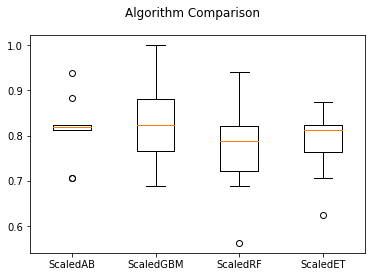

In [18]:
# 集成算法 - 箱线图
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(ensembles.keys())
pyplot.show()

In [19]:
# 集成算法GBM - 调参
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = {'n_estimators': [10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900]}
model = GradientBoostingClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=rescaledX, y=Y_train)
print('最优：%s 使用%s' % (grid_result.best_score_, grid_result.best_params_))

最优：0.8674698795180723 使用{'n_estimators': 700}


In [20]:
# 模型最终化
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5, kernel='rbf')
model.fit(X=rescaledX, y=Y_train)

SVC(C=1.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
# 评估模型
rescaled_validationX = scaler.transform(X_validation)
predictions = model.predict(rescaled_validationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8571428571428571
[[23  4]
 [ 2 13]]
             precision    recall  f1-score   support

          M       0.92      0.85      0.88        27
          R       0.76      0.87      0.81        15

avg / total       0.86      0.86      0.86        42

